In [4]:
#import relevant packagaes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
import random

In [5]:
import skimage
from skimage.transform import resize
from pathlib import Path

In [11]:
# Set seed for reproducibility
random.seed(109)

#1. load data
root = "/Users/kay/Documents/Github/COVID-detection-from-XRay/Data/"
path = os.path.join(root,"NIHCXR/image1")

img_size = 224

df_train_img = list(Path(path).glob("*.png"))

# Randomly sample 500 images
df_train_img = random.sample(df_train_img, 500)

# Keep the list of sampled image filenames
image_filenames_500 = [img_path.name for img_path in df_train_img]

#2. convert images to numpy array
df_train_np = np.empty((len(df_train_img), img_size, img_size, 1), dtype=np.float32)
mpimg.imread(df_train_img[0])

#3. resize images 
for i, img_name in enumerate(df_train_img):
    try:
        temp_image = mpimg.imread(img_name)
        img_resize = resize(temp_image, (img_size, img_size, 1), anti_aliasing=True)
        df_train_np[i] = img_resize
    except:
        continue

#4. save processed images
np.save(os.path.join(path,"NIHCXR images size 224 arrays"), df_train_np, allow_pickle=False, fix_imports=False)

In [12]:
# number of samples
print("number of samples: ", df_train_np.shape[0])
# Image dimension 
print("image dimension (height, width, channel): ", df_train_np.shape[1:])
# Image data type
print("image data type: ", df_train_np.dtype)

number of samples:  500
image dimension (height, width, channel):  (224, 224, 1)
image data type:  float32


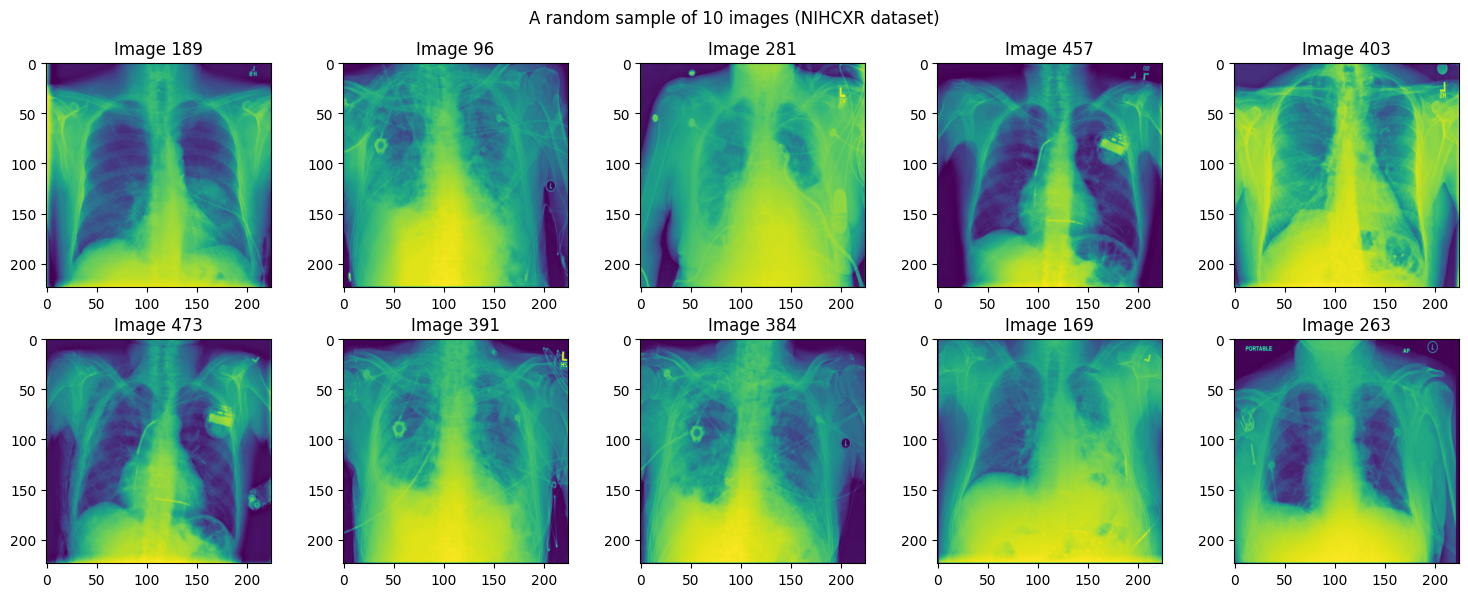

In [37]:
#5. look at a sample from the data, now in numpy format, no longer img format
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

# plot 10 random samples
num = 10
indx = np.random.choice(len(df_train_np)-1, num, replace=False)
for i in range(num):
    axs[i].imshow(df_train_np[i,:,:,:])
    axs[i].set_title(f'Image {indx[i]+1}')

# Adjust layout to prevent overlap
plt.suptitle("A random sample of 10 images (NIHCXR dataset)")
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# Calculate descriptive statistics
# Average image intensity (compare between samples)
print("average image intensity: ", np.mean(np.mean(df_train_np, axis=(1,2,3)))) #== np.mean(df_train)
# Maximum image intensity 
max_intensity= np.max(np.mean(df_train_np, axis=(1,2,3)))
print("maximum image intensity: ", max_intensity)
# Minimum image intensity
min_intensity = np.min(np.mean(df_train_np, axis=(1,2,3)))
print("minimum image intensity: ", min_intensity)
## Stadard deviation of image intensity
print("standard deviation of image intensity: ", np.std(np.mean(df_train_np, axis=(1,2,3))))
print("Standard deviation of pixel values:", np.std(df_train_np))

average image intensity:  0.5158608
maximum image intensity:  0.74893934
minimum image intensity:  0.3004221
standard deviation of image intensity:  0.09409551
Standard deviation of pixel values: 0.25503743


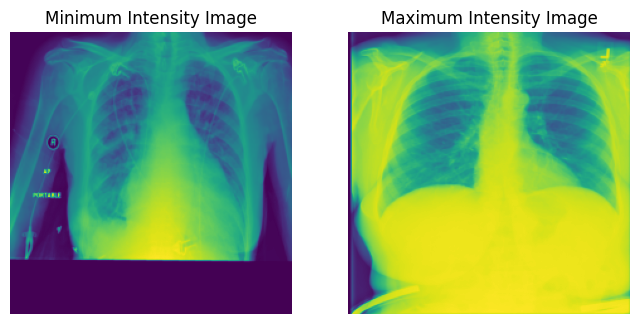

In [19]:
# Find the index of the image with minimum intensity
min_intensity_index = np.argmin(np.mean(df_train_np, axis=(1,2,3)))

# Find the index of the image with maximum intensity
max_intensity_index = np.argmax(np.mean(df_train_np, axis=(1,2,3)))

# Plot the image with minimum intensity
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(df_train_np[min_intensity_index].squeeze())
plt.title('Minimum Intensity Image (NIHCXR Dataset)')
plt.axis('off')

# Plot the image with maximum intensity
plt.subplot(1, 2, 2)
plt.imshow(df_train_np[max_intensity_index].squeeze())
plt.title('Maximum Intensity Image (NIHCXR Dataset)')
plt.axis('off')

plt.show()

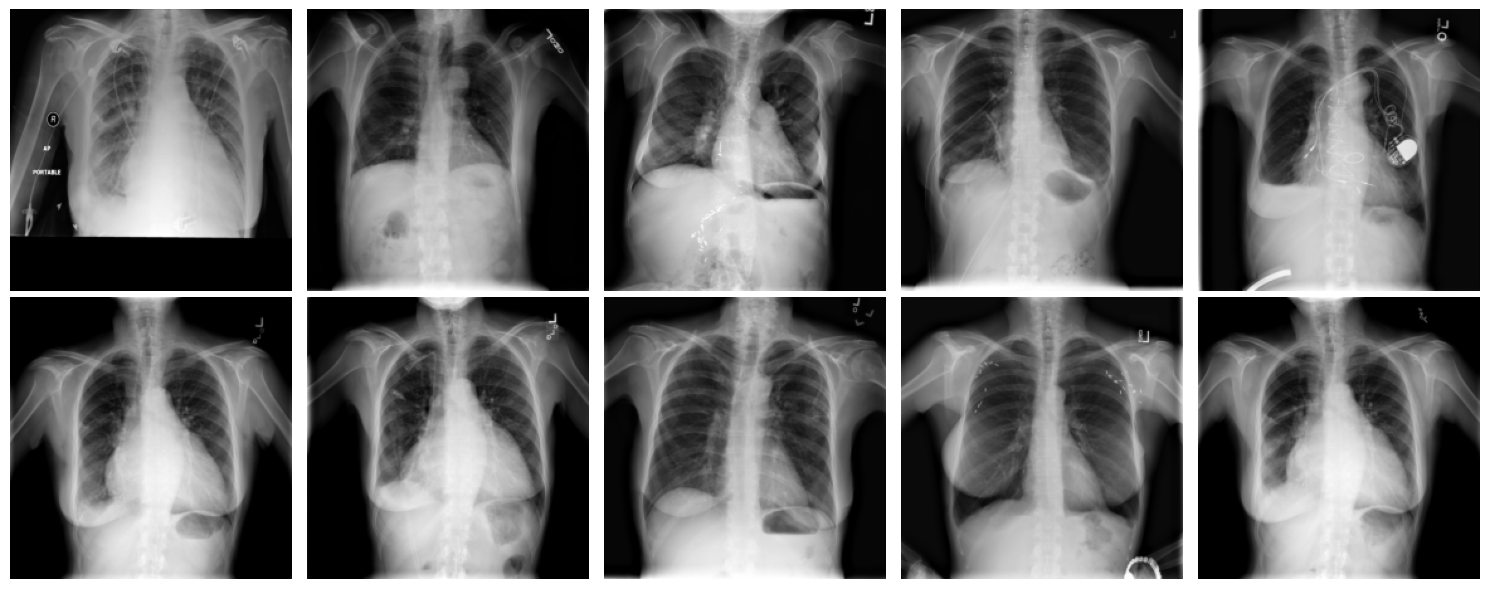

In [20]:
# Compute the average image intensity
average_intensity = np.mean(df_train_np, axis=(1,2,3))

# Sort the images based on their intensity and get the indices of the 10 lowest intensity images
lowest_intensity_indices = np.argsort(average_intensity)[:10]

# Plot the 10 lowest intensity images
plt.figure(figsize=(15, 6))
for i, idx in enumerate(lowest_intensity_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(df_train_np[idx].squeeze(), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

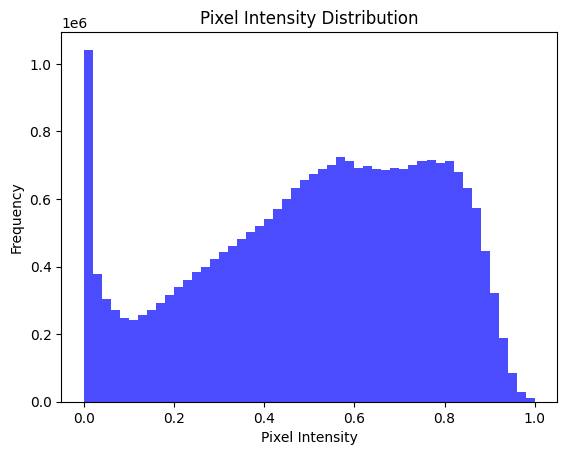

In [21]:
# Flatten the pixel values to compute histogram
pixel_values = df_train_np.flatten()

# Generate histogram
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

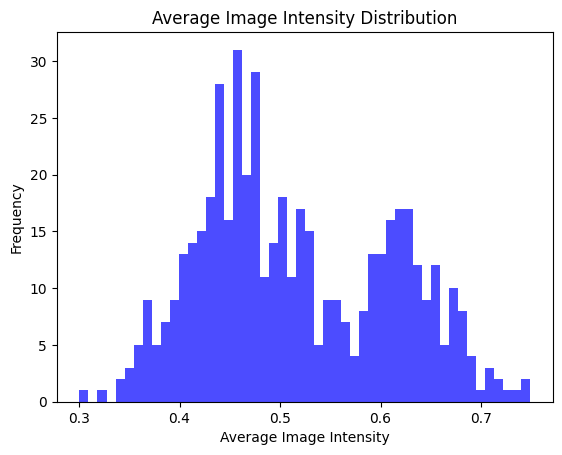

In [22]:
# Flatten the image values to compute histogram
image_values = np.mean(df_train_np, axis=(1,2,3))

# Generate histogram
plt.hist(image_values, bins=50, color='blue', alpha=0.7)
plt.title('Average Image Intensity Distribution')
plt.xlabel('Average Image Intensity')
plt.ylabel('Frequency')
plt.show()

In [23]:
csv_path = os.path.join(root, "NIHCXR", "Data_Entry_2017_v2020.csv")

# Read in labels file
df_labels = pd.read_csv(csv_path)
print(df_labels.head())
print(df_labels.shape)

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                       

In [24]:
# Filter the DataFrame to include only the rows corresponding to the first 500 images
df_labels_500 = df_labels[df_labels['Image Index'].isin(image_filenames_500)]
df_labels_500

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
5,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,0.168
7,00000003_004.png,Hernia,3,3,77,F,PA,2500,2048,0.168,0.168
10,00000003_007.png,Hernia,6,3,80,F,PA,2582,2905,0.143,0.143
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
1212,00000307_000.png,Atelectasis,0,307,57,M,PA,2654,2777,0.143,0.143
1214,00000309_000.png,No Finding,0,309,41,M,AP,2500,2048,0.168,0.168
1218,00000310_003.png,No Finding,3,310,59,M,AP,2500,2048,0.171,0.171
1220,00000310_005.png,No Finding,5,310,59,M,AP,2500,2048,0.168,0.168


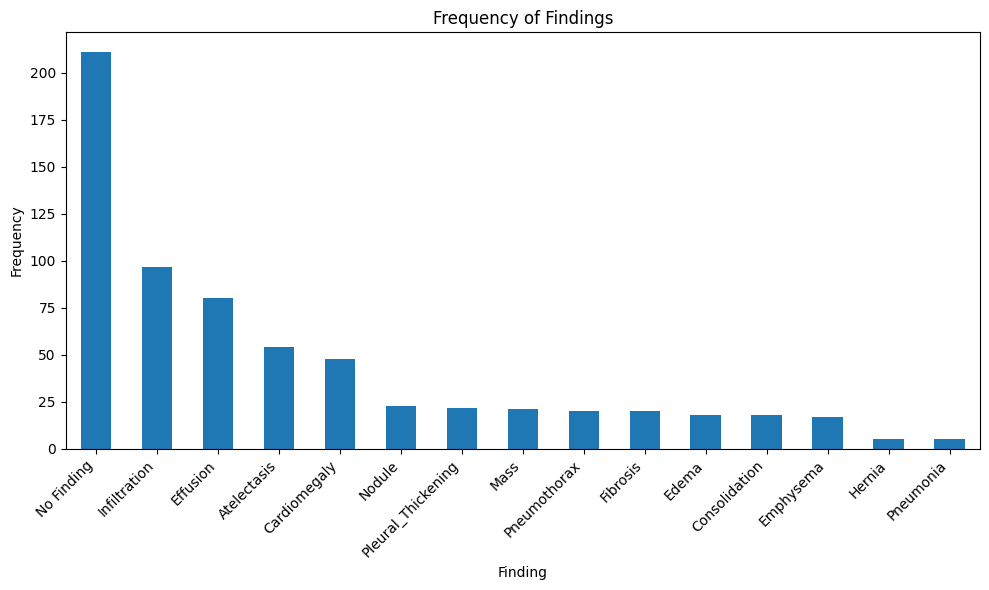

In [25]:
# Split values in the 'Finding Labels' column by '|'
split_values = df_labels_500['Finding Labels'].str.split('|')

# Create a list to store all findings
all_findings = []

# Iterate over each row and add the findings to the list
for values in split_values:
    all_findings.extend(values)

# Count the occurrences of each finding
finding_counts = pd.Series(all_findings).value_counts()

# Plot the frequencies of each finding
plt.figure(figsize=(10, 6))
finding_counts.plot(kind='bar')
plt.title('Frequency of Findings')
plt.xlabel('Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

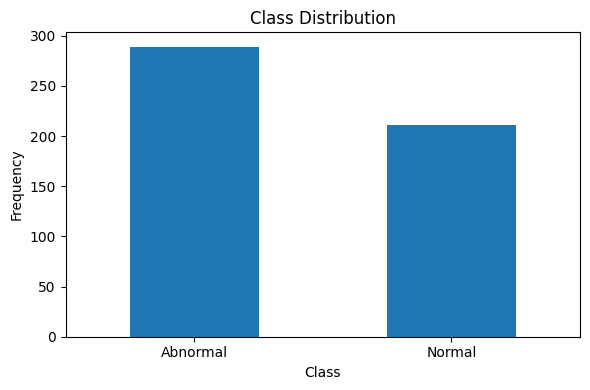

In [26]:
# Calculate the distribution of normal vs. abnormal cases
class_distribution = df_labels_500['Finding Labels'].apply(lambda x: 'Normal' if x == 'No Finding' else 'Abnormal').value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

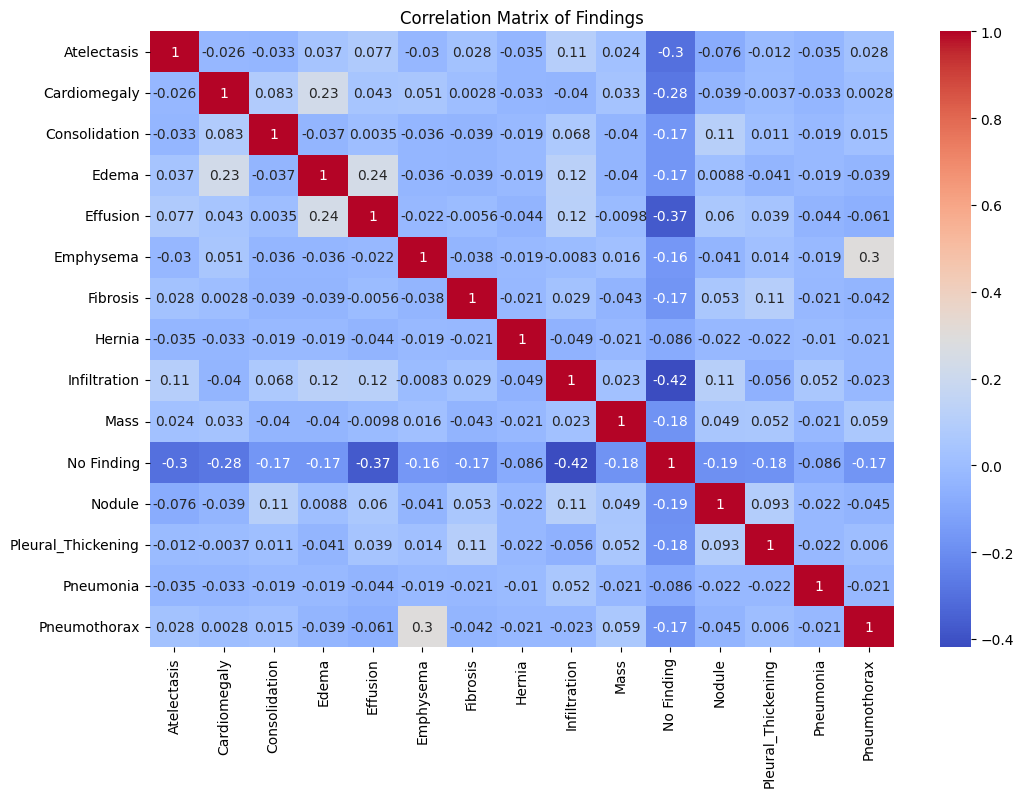

In [27]:
# Create a heatmap to visualize correlations between different findings
correlation_matrix = df_labels_500['Finding Labels'].str.get_dummies(sep='|').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Findings')
plt.show()

In [33]:
split_values.explode().unique()

array(['Cardiomegaly', 'Emphysema', 'Hernia', 'Mass', 'Nodule',
       'No Finding', 'Infiltration', 'Effusion', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Fibrosis', 'Edema',
       'Consolidation', 'Pneumonia'], dtype=object)

In [29]:
df_labels_500[df_labels_500['Finding Labels'].str.contains('Mass')]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168
37,00000012_000.png,Effusion|Mass,0,12,76,M,PA,2992,2991,0.143,0.143
38,00000013_022.png,Infiltration|Mass,0,13,56,M,PA,2870,2991,0.143,0.143
41,00000013_025.png,Cardiomegaly|Infiltration|Mass|Nodule,3,13,56,M,PA,2992,2991,0.143,0.143
60,00000013_044.png,Cardiomegaly|Mass|Pleural_Thickening,22,13,56,M,PA,2992,2991,0.143,0.143
329,00000079_000.png,Mass,0,79,62,M,PA,2500,2048,0.168,0.168
362,00000091_002.png,Infiltration|Mass,2,91,69,M,PA,2992,2991,0.143,0.143
363,00000091_003.png,Mass,3,91,69,M,PA,2910,2991,0.143,0.143
416,00000103_007.png,Mass|Pneumothorax,7,103,59,M,PA,2890,2991,0.143,0.143
417,00000103_008.png,Mass,8,103,59,M,PA,2634,2649,0.143,0.143


In [36]:
# Calculate the average and standard deviation of patient age
average_age = df_labels_500['Patient Age'].mean()
std_dev_age = df_labels_500['Patient Age'].std()

print("Average patient age:", average_age)
print("Standard deviation of patient age:", std_dev_age)

Average patient age: 61.376
Standard deviation of patient age: 12.86817017323032


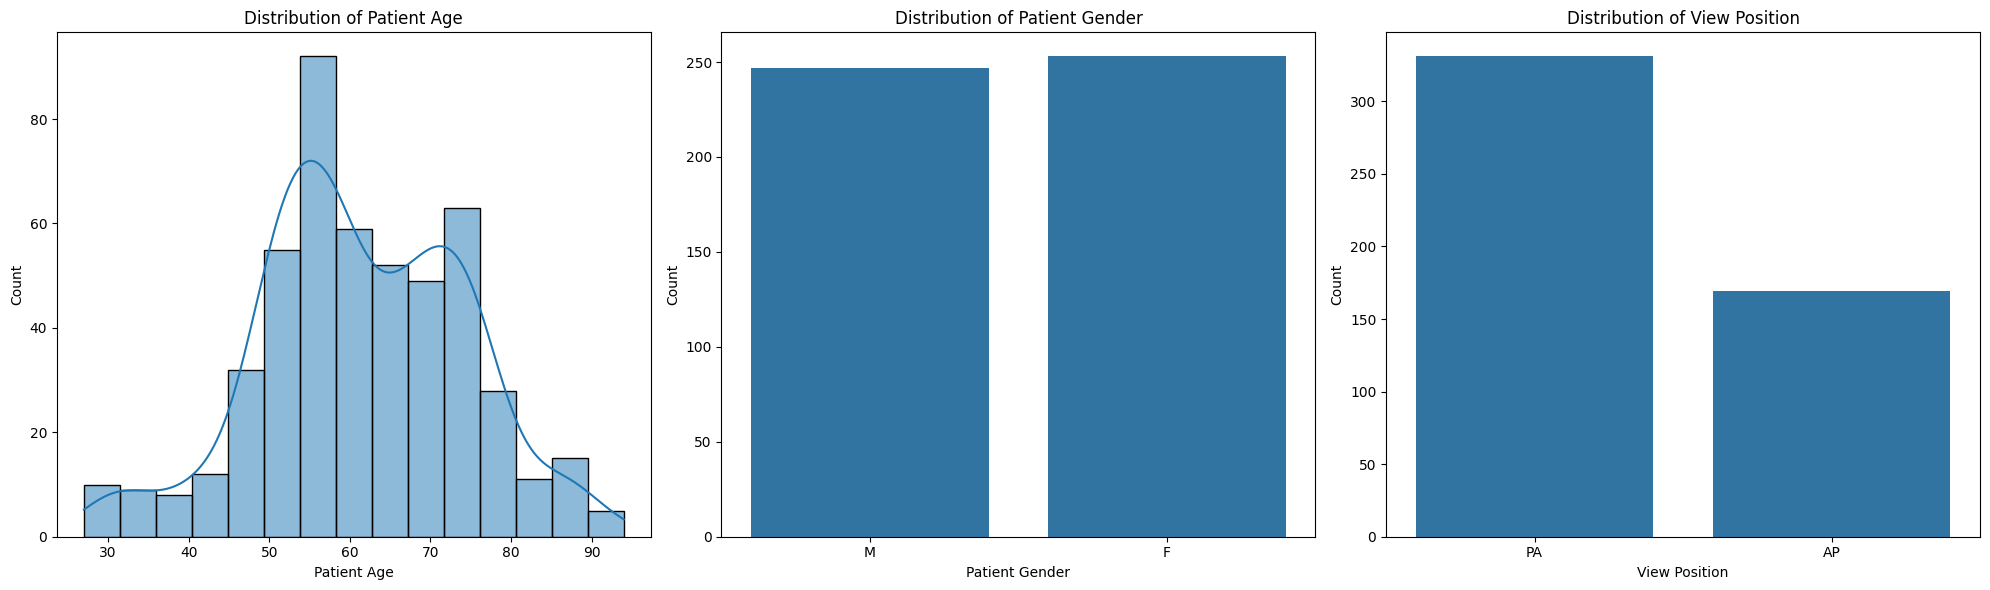

In [32]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Create count plots or histograms for patient age, patient gender, and view position
sns.histplot(data=df_labels_500, x='Patient Age', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Patient Age')
axes[0].set_xlabel('Patient Age')
axes[0].set_ylabel('Count')

sns.countplot(data=df_labels_500, x='Patient Gender', ax=axes[1])
axes[1].set_title('Distribution of Patient Gender')
axes[1].set_xlabel('Patient Gender')
axes[1].set_ylabel('Count')

sns.countplot(data=df_labels_500, x='View Position', ax=axes[2])
axes[2].set_title('Distribution of View Position')
axes[2].set_xlabel('View Position')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

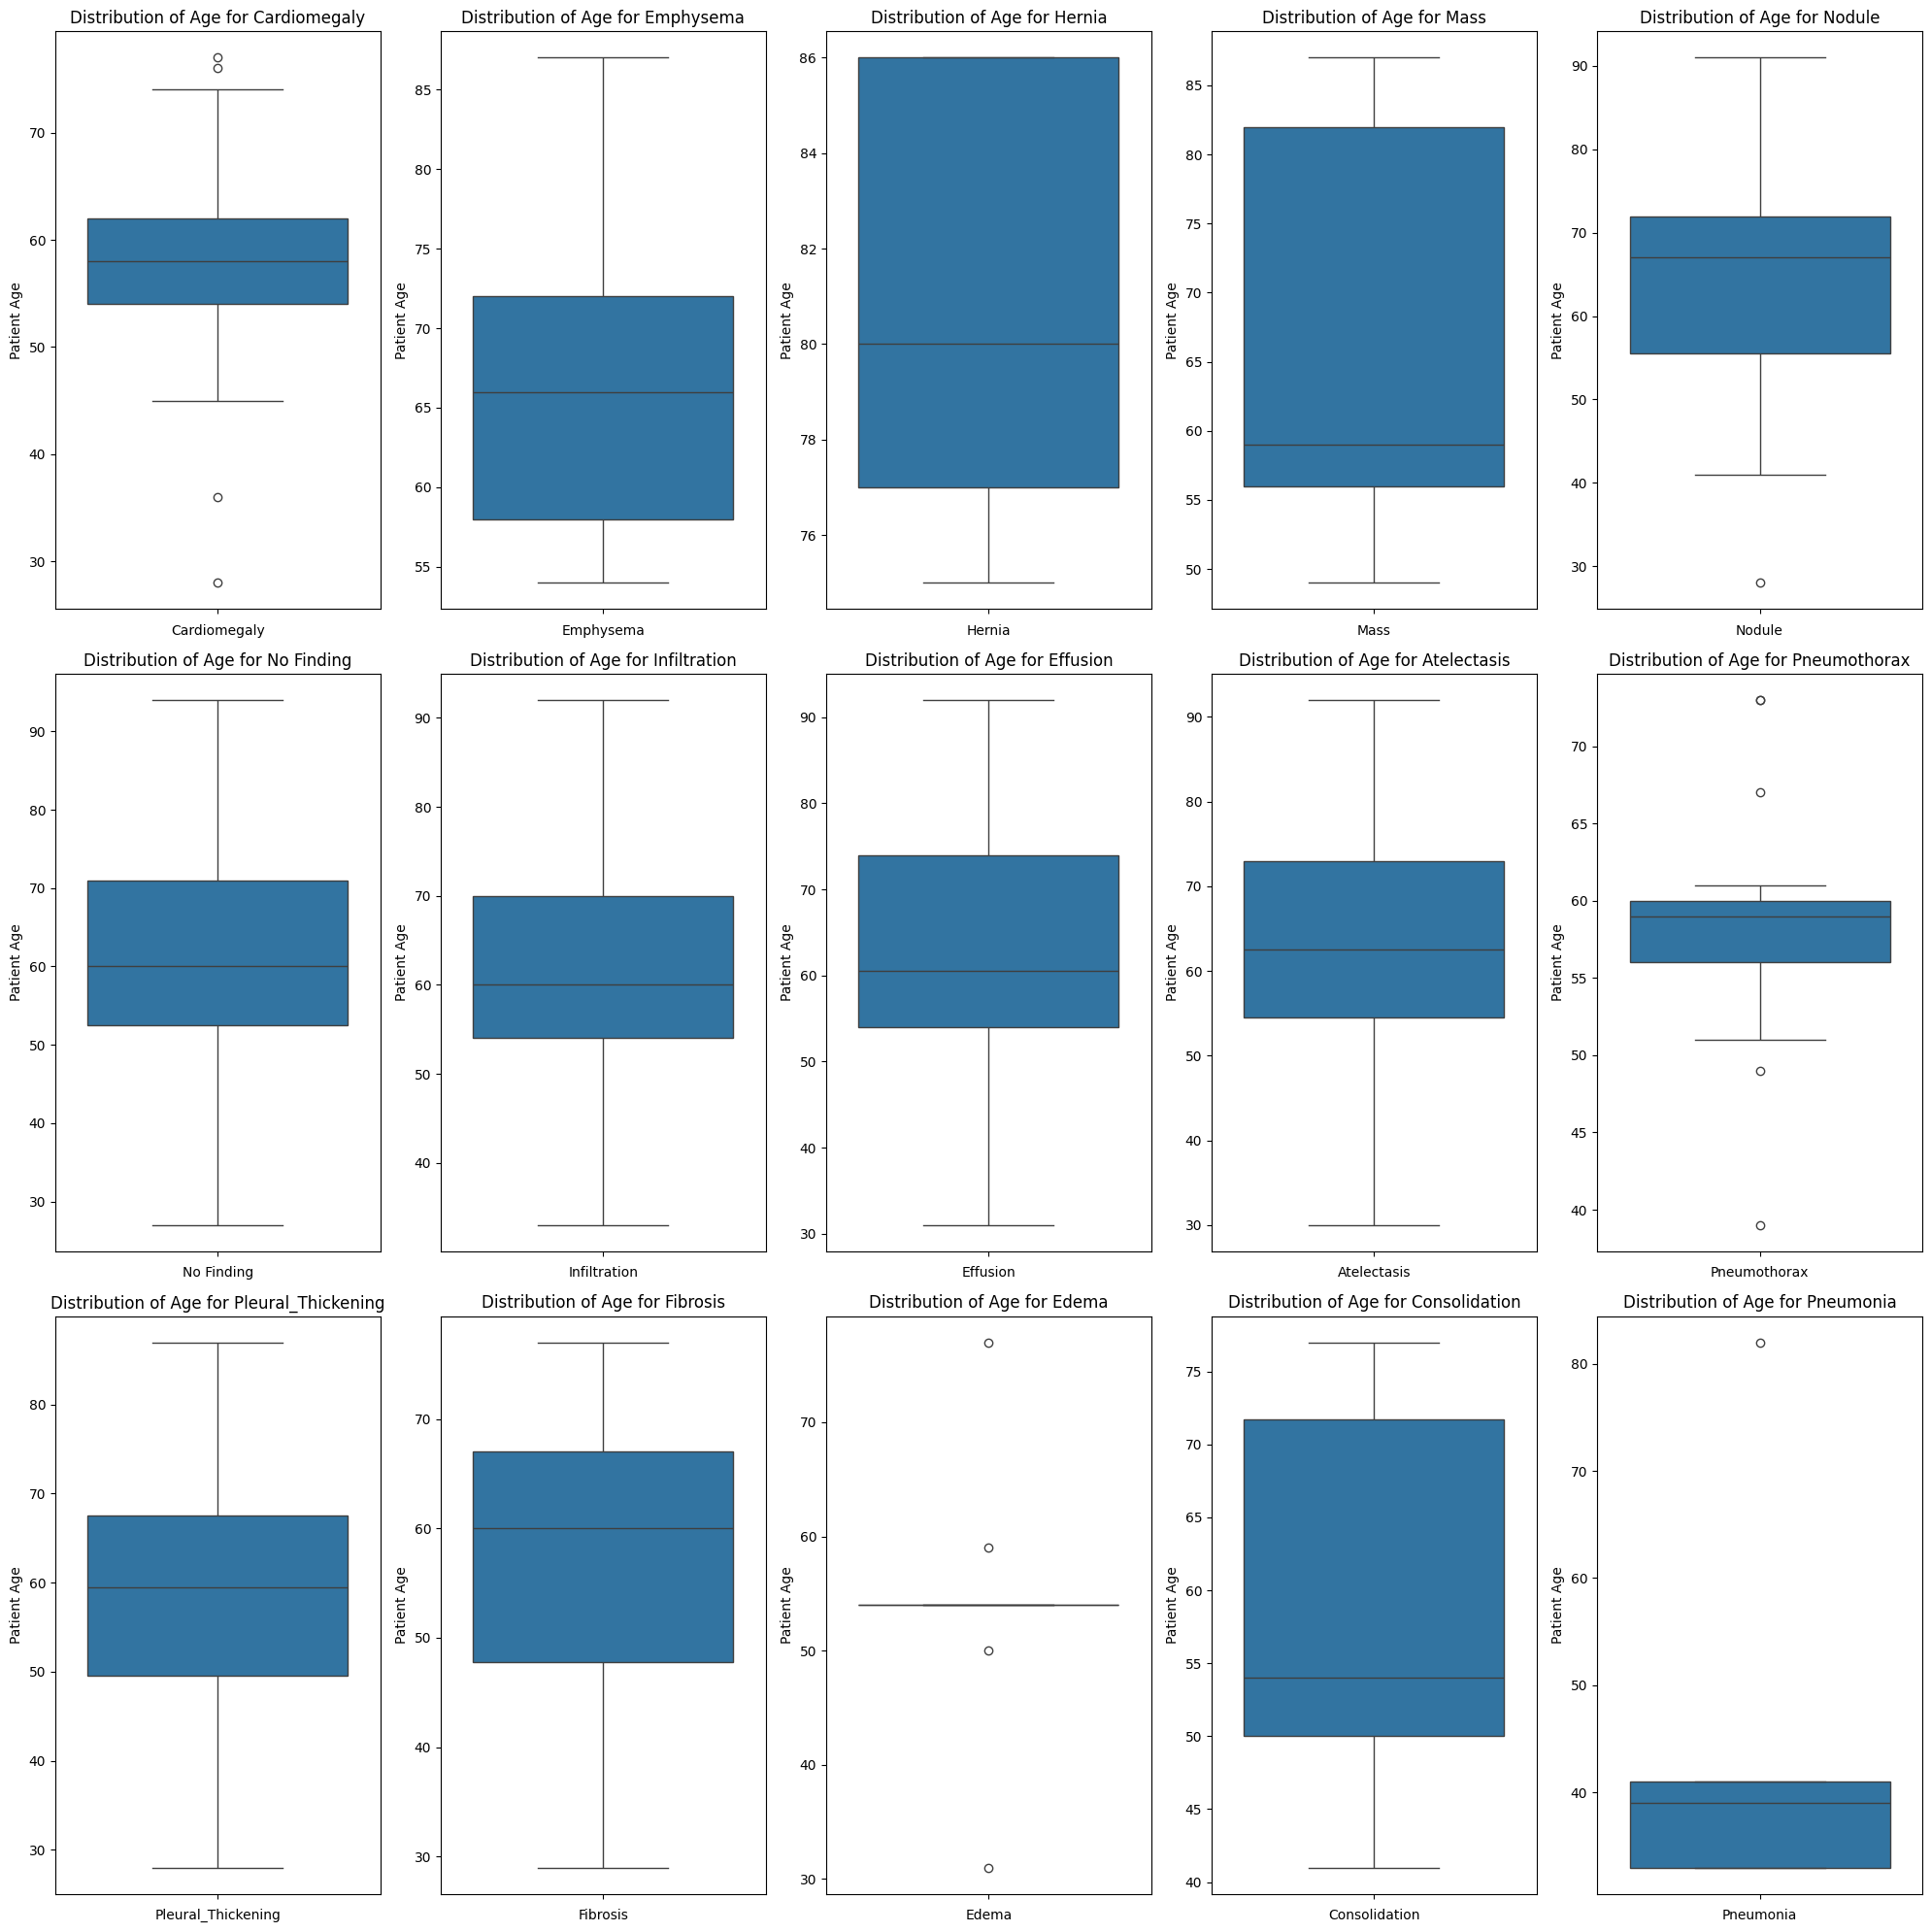

In [34]:
# Create boxplots to compare the distribution of age for different findings
# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each unique finding and create a subplot for each
for i, finding in enumerate(split_values.explode().unique()):
    # Filter the dataframe for the current finding
    subset_df = df_labels_500[df_labels_500['Finding Labels'].str.contains(finding)]
    
    # Create a boxplot for the distribution of patient age in the current subplot
    sns.boxplot(data=subset_df, y='Patient Age', ax=axes[i])
    
    # Set title, x-label, and y-label for the current subplot
    axes[i].set_title(f'Distribution of Age for {finding}')
    axes[i].set_xlabel(f'{finding}')
    axes[i].set_ylabel('Patient Age')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

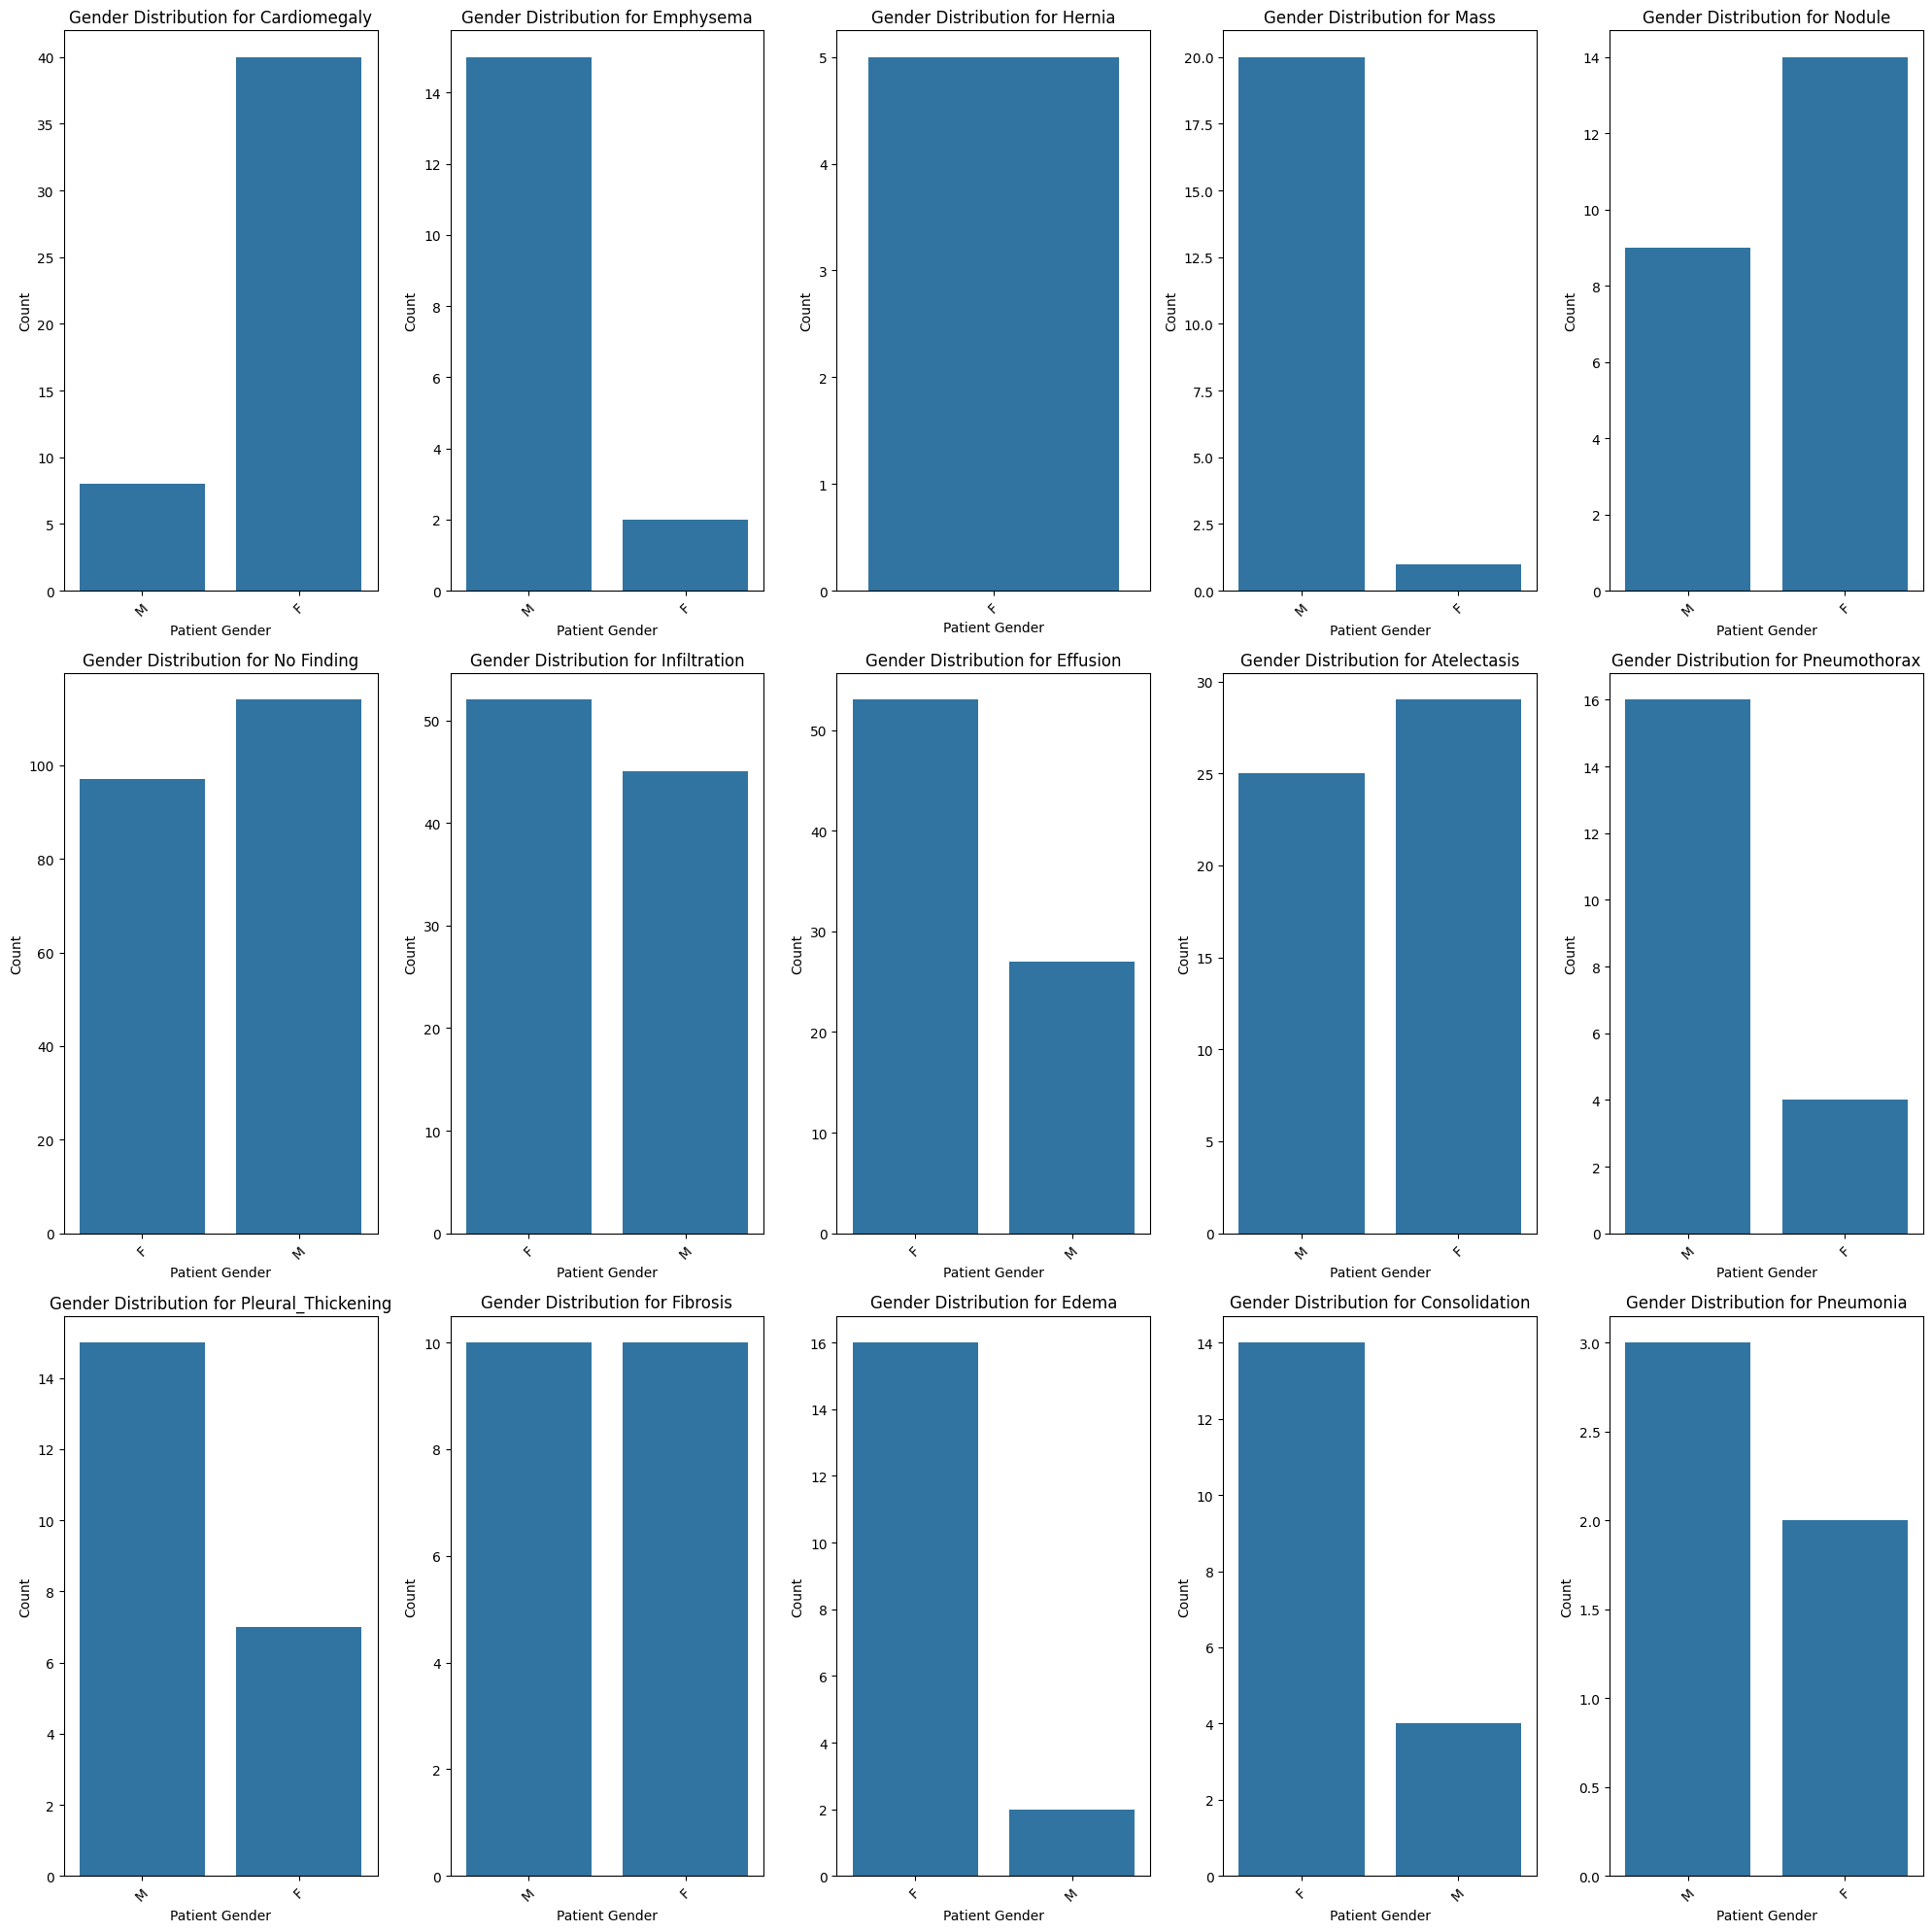

In [35]:
# Create boxplots to compare gender counts for different findings
# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each unique finding and create a subplot for each
for i, finding in enumerate(split_values.explode().unique()):
    # Filter the dataframe for the current finding
    subset_df = df_labels_500[df_labels_500['Finding Labels'].str.contains(finding)]
    
    # Create a count plot for the distribution of patient gender in the current subplot
    sns.countplot(data=subset_df, x='Patient Gender', ax=axes[i])
    
    # Set title, x-label, and y-label for the current subplot
    axes[i].set_title(f'Gender Distribution for {finding}')
    axes[i].set_xlabel('Patient Gender')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()